In [1]:
# Lorenz chaotic system

In [12]:
%matplotlib inline
import pandas as pd
def next_lorenz(x0, y0, z0, dt):
    sig=10
    b=8/3
    r=28
    dxdt = sig*(y0 - x0)
    dydt = r*x0 -y0- x0*z0
    dzdt = x0*y0-b*z0
    dx=dxdt*dt
    dy=dydt*dt
    dz=dzdt*dt
    x=x0+dx
    y=y0+dy
    z=z0+dz
    return x, y, z

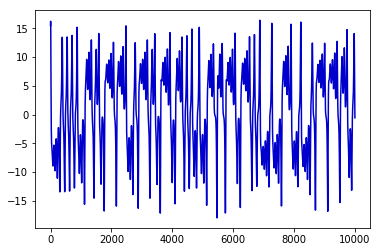

In [13]:
lor1 = []
lor2 = []
lor3 = []
x=15
y=20 
z=30
N = 10000
for i in range(N):
    x1,y1,z1=next_lorenz(x,y,z,0.01)
    #print'%s.' %x1,y1,z1
    x=x1
    y=y1
    z=z1
    lor1.append(x)
    lor2.append(y)
    lor3.append(z)
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.plot(lor1,'mediumblue')

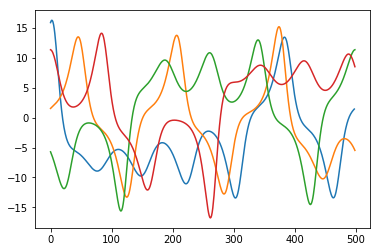

In [4]:
x_1 = lor1[1:500]
plt.plot(x_1)
x_2 = lor1[500:1000]
plt.plot(x_2)
x_3 = lor1[1000:1500]
plt.plot(x_3)
x_4 = lor1[1500:2000]
plt.plot(x_4)

In [5]:
# Sine wave

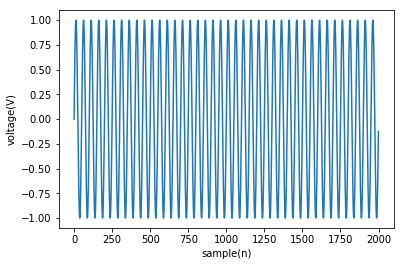

In [24]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 10000
f = 200
sample = 2000
x = np.arange(sample)
sin = 1*np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, sin)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

In [ ]:
#rossler system

In [14]:
def next_rossler(x0, y0, z0, dt):
    a=0.13
    b=0.2
    c=6.5
    dxdt = -y0-z0
    dydt = x0+a*y0
    dzdt = b+z0*(x0-c)
    dx=dxdt*dt
    dy=dydt*dt
    dz=dzdt*dt
    x=x0+dx
    y=y0+dy
    z=z0+dz
    return x, y, z

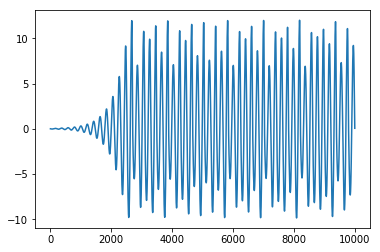

In [52]:
ros1 = []
ros2 = []
ros3 = []
x=0
y=0 
z=0
for i in range(10000):
    x1,y1,z1=next_rossler(x,y,z,0.03)
    #print'%s.' %x1,y1,z1
    x=x1
    y=y1
    z=z1
    ros1.append(x)
    ros2.append(y)
    ros3.append(z)
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
#ax = plt.axes(projection='3d')
plt.plot(ros1)
#ax.plot3D(out1, out2, out3, 'b')

In [ ]:
#lyapunov exponenet

import nolds

lm = out1
#rwalk = np.cumsum(np.random.random(1000))
#plt.plot(ts)
x = np.fromiter(lm, dtype="float32")
l = max(nolds.lyap_e(x))
s = nolds.lyap_e(x)
print l
print s

/home/jobin/anaconda2/lib/python2.7/site-packages/nolds/measures.py:512: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(mat_X, vec_beta)


In [22]:
#Hurst exponent
import nolds
import numpy as np

#rwalk = np.cumsum(np.random.random(1000))
h = nolds.hurst_rs(sin)
print h

0.8702192470770773


(20000, 1)


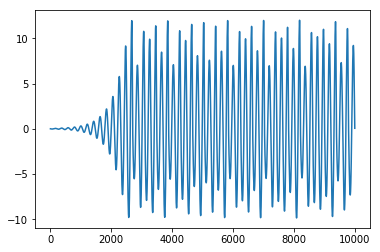

In [56]:
#direct time series feed method- each sample is assigned to a class
lor = np.asarray(lor1)
lor = lor.reshape(10000,1)
ros = np.asarray(ros1)
ros = ros.reshape(10000,1)
#sin = sin.reshape(10000,1)

data = np.concatenate((lor, ros), axis = 0)
#print data
print data.shape
plt.plot(ros)
#lor_y = np.ones((2500,1))
#sin_y = np.zeros((2500,1))
#target = np.concatenate((lor_y, sin_y), axis = 0)
#print target.shape

In [19]:
from sklearn.model_selection import train_test_split

#feature_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'data' is not defined

In [79]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.98


In [80]:
# Predicting the Test set results
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

In [81]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[654   0]
 [ 30 566]]


In [82]:
#Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.76
Accuracy of SVM classifier on test set: 0.74


In [83]:
# Predicting the Test set results
y_pred = svm.predict(X_test)
y_pred = (y_pred > 0.5)

In [84]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[400 254]
 [ 71 525]]


In [85]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
#Initializing Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 1))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=1, units=6)`
  
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  


In [86]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 500, nb_epoch = 100)

Epoch 1/100
3750/3750 [==============================] - 0s 55us/step - loss: 0.6931 - acc: 0.5003
Epoch 2/100
3750/3750 [==============================] - 0s 4us/step - loss: 0.6931 - acc: 0.5077
Epoch 3/100
3750/3750 [==============================] - 0s 3us/step - loss: 0.6931 - acc: 0.5077
Epoch 4/100
3750/3750 [==============================] - 0s 4us/step - loss: 0.6931 - acc: 0.5077
Epoch 5/100
3750/3750 [==============================] - 0s 5us/step - loss: 0.6930 - acc: 0.5077
Epoch 6/100
3750/3750 [==============================] - 0s 4us/step - loss: 0.6930 - acc: 0.5077
Epoch 7/100
3750/3750 [==============================] - 0s 4us/step - loss: 0.6930 - acc: 0.5077
Epoch 8/100
3750/3750 [==============================] - 0s 4us/step - loss: 0.6929 - acc: 0.5077
Epoch 9/100
3750/3750 [==============================] - 0s 4us/step - loss: 0.6928 - acc: 0.5077
Epoch 10/100
3750/3750 [==============================] - 0s 4us/step - loss: 0.6927 - acc: 0.5077
Epoch 11/100
3750/

In [87]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [88]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[317 337]
 [ 53 543]]


In [ ]:
#Feature extraction of dynamic systems

In [57]:
time_series_trl1 = lor
time_series_trl2 = ros
lor.shape

(10000, 1)

In [69]:
# feature extraction method
en, Num, PP2,P2, RM1,f,C2 = 0, 500, [], [], [], [],[]
for st in range(0, 9500, Num-1):
    en = en + Num
    #Time domain feature extraction
    x1 = time_series_trl1[st:en]
    #1. RMS of the x dimension
    for g in range(0, Num, 50):
        RM = np.sqrt(np.mean(x1**2))
        RM1.append(RM)
        RMS_lor = np.asarray(RM1)
    #2. Peak to Peak
    
    for i in range(0, Num, 50):
        PP1=0.5*(max(x1[i:i+49])-min(x1[i:i+49]))
        PP2.append(PP1)
        #PP.reshape(1,10)
        PP_lor = np.asarray(PP2)
        
    #3. peak
    mref=0
    for j in range(1, Num, 50):
        P1=max(x1[j:j+49])-mref
        P2.append(P1)
        P_lor = np.asarray(P2)
        
    #4. crest factor
    
    #C1 = P/RMS
    #C2.append(C1)
    #CF = np.array(C2)
    #5. Kurtosis
    #for k in range(1, Num, 50):
        #K = (-3+(1/Num)*sum(x1[k]-np.mean(x1))**4)/(((1/Num)*sum(x1[k]-np.mean(x1))**2)**2)
    
    
# feature extracted from the pattern are concatenated
RMS = RMS.reshape(200,1)
PP = PP.reshape(200,1)
P = P.reshape(200,1)
T1=np.ones((200,1))
F1 = np.concatenate((RMS, PP,P,T1), axis=1)

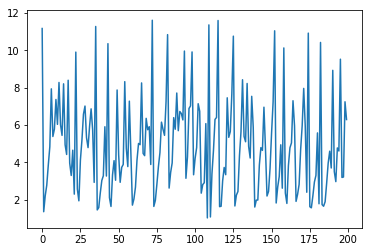

In [70]:
plt.plot(PP_lor)

In [67]:
# feature extraction method
en, Num, PP2,P2, RM1,f,C2 = 0, 500, [], [], [], [],[]
for st in range(0, 9500, Num-1):
    en = en + Num
    #Time domain feature extraction
    x1 = time_series_trl2[st:en]
    #1. RMS of the x dimension
    for g in range(0, Num, 50):
        RM = np.sqrt(np.mean(x1**2))
        RM1.append(RM)
        RMS_ros = np.asarray(RM1)
    #2. Peak to Peak
    
    for i in range(0, Num, 50):
        PP1=0.5*(max(x1[i:i+49])-min(x1[i:i+49]))
        PP2.append(PP1)
        #PP.reshape(1,10)
        PP_ros = np.asarray(PP2)
        
    #3. peak
    mref=0
    for j in range(1, Num, 50):
        P1=max(x1[j:j+49])-mref
        P2.append(P1)
        P_ros = np.asarray(P2)
        
    #4. crest factor
    
    #C1 = P/RMS
    #C2.append(C1)
    #CF = np.array(C2)
    #5. Kurtosis
    #for k in range(1, Num, 50):
        #K = (-3+(1/Num)*sum(x1[k]-np.mean(x1))**4)/(((1/Num)*sum(x1[k]-np.mean(x1))**2)**2)
    
    
# feature extracted from the pattern are concatenated
RMS = RMS.reshape(200,1)
PP = PP.reshape(200,1)
P = P.reshape(200,1)
T2=np.zeros((200,1))
F2 = np.concatenate((RMS, PP,P,T2), axis=1)

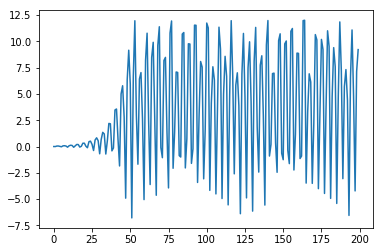

In [68]:
plt.plot(P_ros)

In [22]:

F = np.concatenate((F1, F2), axis=0)
F.shape

(800, 4)

In [23]:
import csv
myFile = open('Lor.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(F)
     
print("Writing complete")

Writing complete


In [24]:
train_data = pd.read_csv('../Python/Dataset/Lor')
train_data.head()

,RMS,P2P,Peak,Target
0,0.043966,0.014793,-0.000180,1.0
1,0.043966,0.013287,-0.002628,1.0
2,0.043966,0.023282,0.045481,1.0
3,0.043966,0.013483,0.047810,1.0
4,0.043966,0.031537,0.016842,1.0


(800, 4)
[1. 0.]
Target
0.0    400
1.0    400
dtype: int64


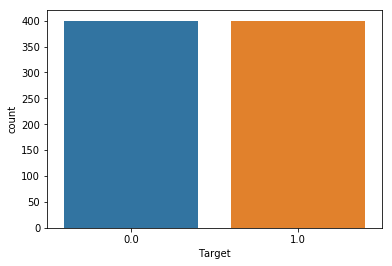

In [25]:
print(train_data.shape)
print(train_data['Target'].unique())
print(train_data.groupby('Target').size())
import seaborn as sns
sns.countplot(train_data['Target'],label="Count")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

feature_names = ['RMS', 'P2P', 'Peak']
X = train_data[feature_names]
y = train_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
#Initializing Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 3))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=3, units=6)`
  
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  


In [31]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
640/640 [==============================] - 0s 423us/step - loss: 0.6932 - acc: 0.5094
Epoch 2/100
640/640 [==============================] - 0s 133us/step - loss: 0.6932 - acc: 0.4656
Epoch 3/100
640/640 [==============================] - 0s 126us/step - loss: 0.6930 - acc: 0.5125
Epoch 4/100
640/640 [==============================] - 0s 152us/step - loss: 0.6930 - acc: 0.5125
Epoch 5/100
640/640 [==============================] - 0s 130us/step - loss: 0.6930 - acc: 0.5125
Epoch 6/100
640/640 [==============================] - 0s 140us/step - loss: 0.6931 - acc: 0.5125
Epoch 7/100
640/640 [==============================] - 0s 144us/step - loss: 0.6930 - acc: 0.5125
Epoch 8/100
640/640 [==============================] - 0s 141us/step - loss: 0.6930 - acc: 0.5125
Epoch 9/100
640/640 [==============================] - 0s 136us/step - loss: 0.6929 - acc: 0.5125
Epoch 10/100
640/640 [==============================] - 0s 135us/step - loss: 0.6929 - acc: 0.5125
Epoch 11/100
640/64

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0 88]
 [ 0 72]]


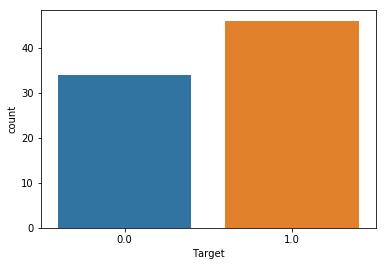

In [290]:
sns.countplot(y_test[:],label="Count")
plt.show()